# Plotting Tutorial - compare plot 

In this example we 'compare' runs between (usually) two different runs. However as I do not yet have two different files, the example plots will look at changes between timesteps and layers instead. 

[This is a work in progress!]

In [1]:
import aervis.plotting as ap


AerVis 0.0.2
:: AerVis plotting imports complete ::


## Overlapping Variables
As I do not have a base and perturbed run, I begin by finding the overlap between two runs. To do this we use the `AerComp` class providing it with a base and a perturbed file 

In [2]:
base = '../../ACURE_PPE_001_bs714a.nc'
peturbed = '../../bk417a.nc'

compare = ap.AerComp(base, peturbed)

In [3]:
#### Having loaded the files we can compare variables 

In [4]:
inboth = compare.diff_var()
# Print the first 10 variables which appear in both. 
print('The first 10 matches are:\n',list(inboth)[:10])

The first 10 matches are:
 ['m01s00i507', 'm01s30i114', 'm01s50i217', 'm01s03i232', 'm01s01i271', 'm01s03i226', 'm01s05i205', 'm01s05i231', 'm01s34i109', 'm01s02i252']


In [5]:
compare.stashinfo('m01s02i422')

--- m01s02i422 ---
	BASE (ACURE_PPE_001_bs714a.nc)
		description: atmosphere optical thickness due to dust ambient aerosol
		dims: ('pseudo_level', 'latitude', 'longitude')


	PETURBED (bk417a.nc)
		description: atmosphere optical thickness due to dust ambient aerosol
		dims: ('pseudo_level', 'time', 'latitude', 'longitude')


## variable contents
#### We can expolre each dimension using the `get_vars` function

In [6]:
compare.get_vars('pseudo_level')

{'base': masked_array(data=[  3,   4,   6,   7,   8,   9, 101, 102, 103, 201, 202,
                    301, 302, 401, 402, 501, 502, 901, 902, 903, 904, 905,
                    906, 907, 908, 909, 910],
              mask=False,
        fill_value=999999,
             dtype=int32),
 'peturbed': masked_array(data=[  3,   4,   6,   7,   8,   9, 101, 102, 103, 201, 202,
                    301, 302, 401, 402, 501, 502, 901, 902, 903, 904, 905,
                    906, 907, 908, 909, 910],
              mask=False,
        fill_value=999999,
             dtype=int32)}

#### However we can also see that only one of the files contains a time dimension
Using this we can see that trying to view it for both will create an error:

In [7]:
compare.get_vars('time')

Stashcode %s does not exist in both files


#### To overcome get its values we need to read it manually

In [8]:
compare.peturbed.variables['time']

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    _FillValue: nan
    standard_name: time
    units: hours since 1970-01-01
    calendar: gregorian
unlimited dimensions: 
current shape = (4,)
filling on

#### If we want a human readable dictionary we can use `gettime` with the run we wish to use

In [9]:
compare.gettime('peturbed')

{'16-01-2008 00:00': 333456.0,
 '15-02-2008 00:00': 334176.0,
 '16-03-2008 00:00': 334896.0,
 '15-04-2008 00:01': 335616.0}

## Selecting comparison parameters 
#### We need to make a selection of items to plot from each dataset and give it to the plotting function

### Unfortunately as we only have one working file (containing Latitude coordinates we will use the same file with different timesteps

In [10]:
base = '../../bk417a.nc'
peturbed = '../../bk417a.nc'

compare = ap.AerComp(base, peturbed)

In [11]:
stashcode = 'm01s02i422'
base_plot = {'pseudo_level':0,'time':0}
peturbed_plot = {'pseudo_level':0,'time':1}

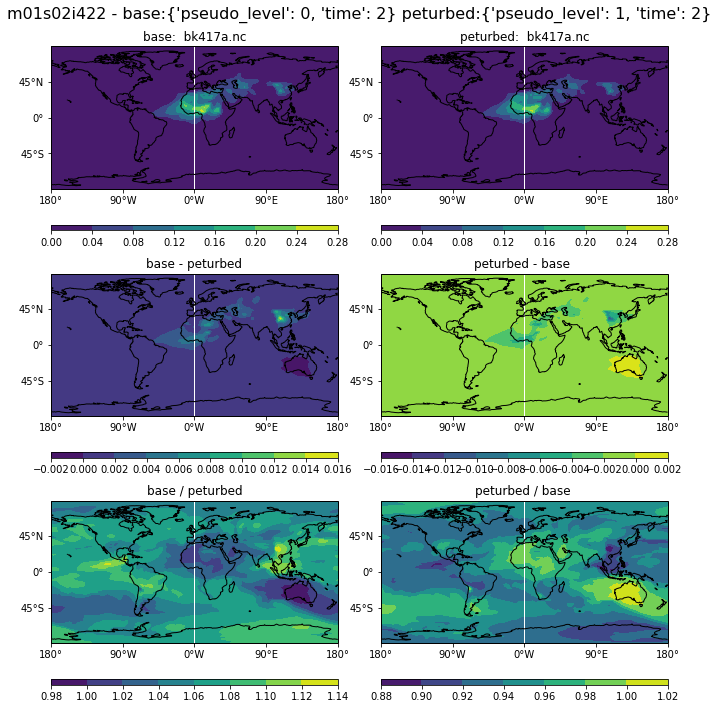

In [14]:
compare.compareplot(stashcode,[base_plot,peturbed_plot])

## Multiple plots (cycling through comparison inputs)

In the case where we are saving plots, or creating multiples it is useful to put the plotting function within a loop. This can potentially be run in parallel... Scripts can be added once we know what this code is to be used as?


The followign example cycles through timesteps. For each set of plots I will compare psueudolevel 0 with pseudolevel 1 - I need some example runs.  




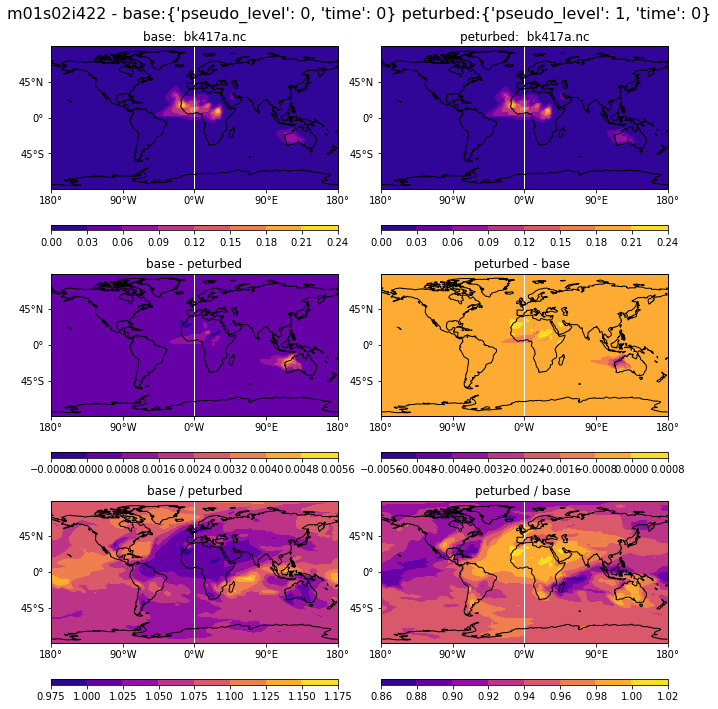

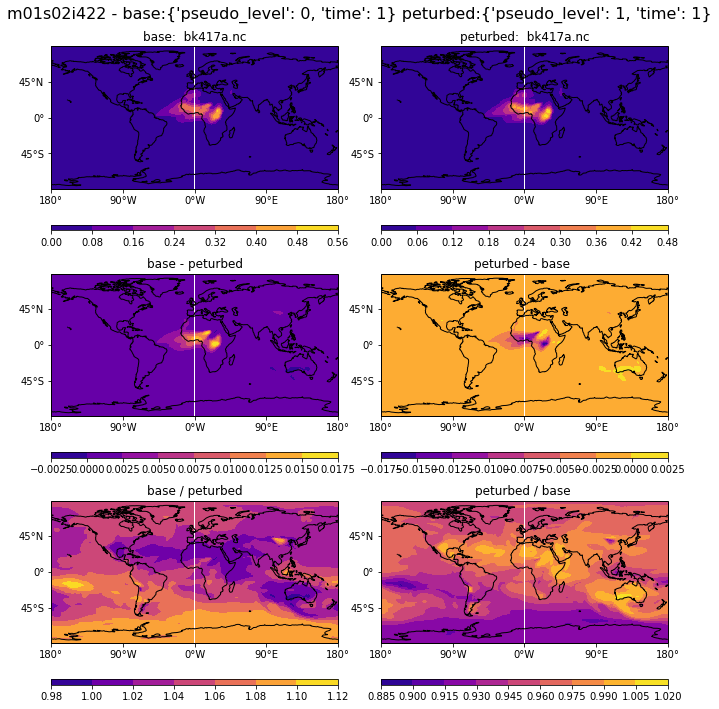

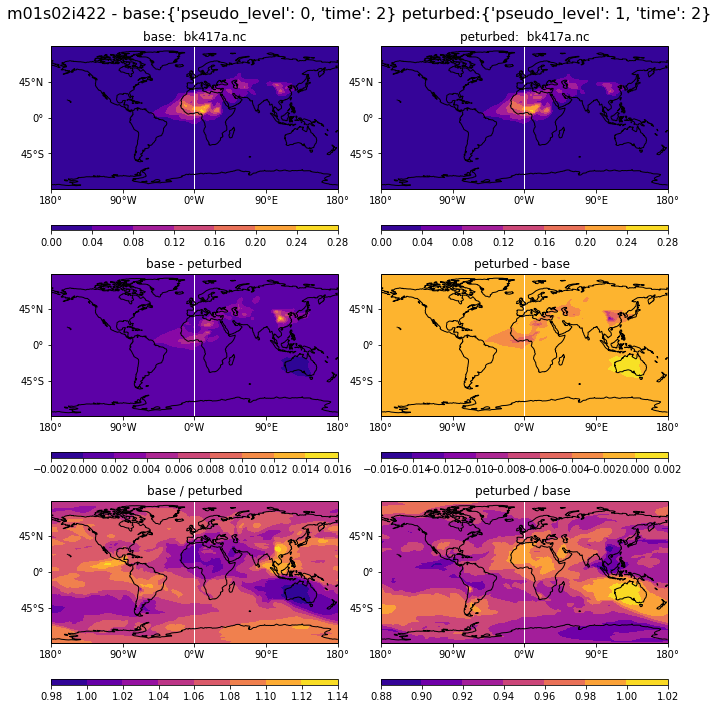

In [13]:
stashcode = 'm01s02i422'

for timestep in range(len(compare.gettime('peturbed').values())-1):    
    # insert loop variables in parameters
    base_plot = {'pseudo_level':0,'time':timestep}
    peturbed_plot = {'pseudo_level':1,'time':timestep}
    
    #plotcode
    compare.compareplot(stashcode,[base_plot,peturbed_plot],cmap='plasma')
    